In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Datamining/


 2019.csv				   energy_dataset.csv	        realKnownCause
 airline-passengers.csv			   groceriesdataset2.csv        station_day.csv
 california-house-prices		   groceriesdataset.csv         train.csv
 city_hour.csv				   house-prediction-train.csv   TSLA.csv
'Data Science ML Full Stack Roadmap.pdf'   ieee-fraud-detection


In [14]:
#Dataset Selection and Loading

import pandas as pd

# Replace with the actual path to your train.csv file in Google Drive
file_path = '/content/drive/MyDrive/Datamining/2019.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [15]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [16]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [17]:
#Preprocessing the data

# Check for missing values
print(data.isnull().sum())

# Re-structuring columns (if any)
country_data = data['Country or region']  # Storing this separately for later
df_numeric = data.drop(columns=['Country or region'])

df_numeric.head()
# Handle missing values, if any, by filling them with the mean of the column
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Check the structure of the dataset
df_numeric.info()

# Display basic statistics for the numerical columns
df_numeric.describe()


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Score                         156 non-null    float64
 2   GDP per capita                156 non-null    float64
 3   Social support                156 non-null    float64
 4   Healthy life expectancy       156 non-null    float64
 5   Freedom to make life choices  156 non-null    float64
 6   Generosity                    156 non-null    float64
 7   Perceptions of corruption     156 non-nul

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [18]:
#Preprocessing and future scaling

# Handle missing values (if any) by filling them with the mean
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Standardize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Convert back to a DataFrame for easier manipulation
scaled_df = pd.DataFrame(scaled_data, columns=df_numeric.columns)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

   Overall rank     Score  GDP per capita  Social support  \
0     -1.720983  2.128711        1.095042        1.268098   
1     -1.698777  1.976397        1.203324        1.221154   
2     -1.676571  1.934938        1.467734        1.251332   
3     -1.654365  1.880862        1.195769        1.392163   
4     -1.632158  1.875454        1.236060        1.050146   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                 1.080422                      1.424282   -0.335404   
1                 1.121857                      1.396277    0.707265   
2                 1.254446                      1.473292    0.907373   
3                 1.246159                      1.389276    1.781530   
4                 1.134287                      1.151229    1.444506   

   Perceptions of corruption  
0                   2.996757  
1                   3.177158  
2                   2.444941  
3                   0.078500  
4                   1.988632  


KMeans Silhouette Score: 0.3326529932432768
Agglomerative Clustering Silhouette Score: 0.3108072918411597
DBSCAN Silhouette Score (excluding outliers): 0.5473528586393702
Number of outliers detected by DBSCAN: 124


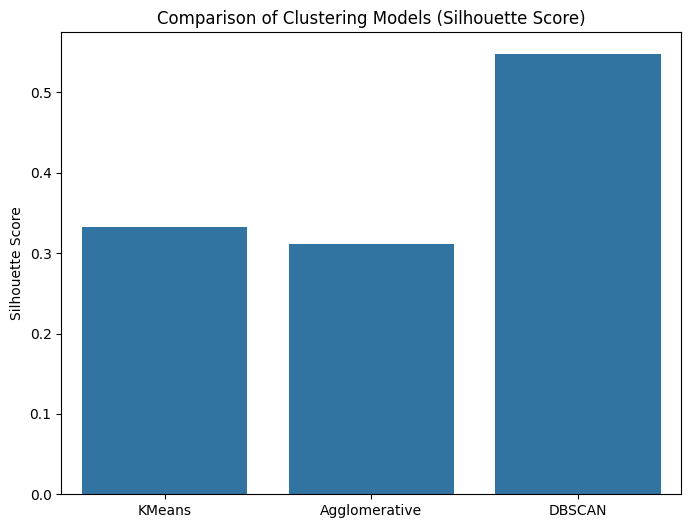

In [19]:
#Comparing models

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Evaluate KMeans with Silhouette Score
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette}')

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(scaled_data)

# Evaluate Agglomerative Clustering with Silhouette Score
agglo_silhouette = silhouette_score(scaled_data, agglo_labels)
print(f'Agglomerative Clustering Silhouette Score: {agglo_silhouette}')

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# DBSCAN can assign labels of -1 for outliers, so filter them out for Silhouette Score
dbscan_silhouette = silhouette_score(scaled_data[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
print(f'DBSCAN Silhouette Score (excluding outliers): {dbscan_silhouette}')

# Number of outliers identified by DBSCAN
num_outliers = np.sum(dbscan_labels == -1)
print(f'Number of outliers detected by DBSCAN: {num_outliers}')

# Compare Silhouette Scores
models = ['KMeans', 'Agglomerative', 'DBSCAN']
silhouette_scores = [kmeans_silhouette, agglo_silhouette, dbscan_silhouette]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=silhouette_scores)
plt.title('Comparison of Clustering Models (Silhouette Score)')
plt.ylabel('Silhouette Score')
plt.show()


In [21]:
#DBScan clustering
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Count the number of outliers (-1 label indicates outliers)
num_outliers = np.sum(dbscan_labels == -1)
print(f'Number of outliers detected by DBSCAN: {num_outliers}')

# Add the cluster labels to the original dataset
scaled_df['Cluster'] = dbscan_labels

# Check the distribution of clusters (excluding outliers)
print(scaled_df['Cluster'].value_counts())


Number of outliers detected by DBSCAN: 124
Cluster
-1    124
 1     16
 0     11
 2      5
Name: count, dtype: int64


In [22]:
#Evaluate performance

from sklearn.metrics import silhouette_score

# Exclude outliers (-1) when calculating silhouette score
valid_clusters = dbscan_labels != -1
dbscan_silhouette = silhouette_score(scaled_data[valid_clusters], dbscan_labels[valid_clusters])
print(f'DBSCAN Silhouette Score (excluding outliers): {dbscan_silhouette}')


DBSCAN Silhouette Score (excluding outliers): 0.5473528586393702


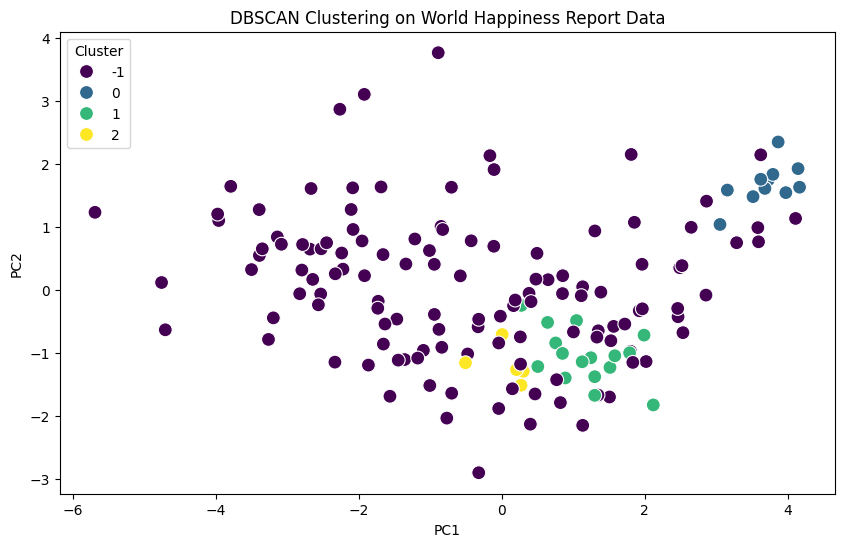

Outliers detected by DBSCAN:
0                       Finland
3                       Iceland
9                       Austria
11                   Costa Rica
12                       Israel
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, Length: 124, dtype: object


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for easier plotting
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = dbscan_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100)
plt.title('DBSCAN Clustering on World Happiness Report Data')
plt.show()

# Visualize the outliers
outliers = pca_df[pca_df['Cluster'] == -1]
print(f"Outliers detected by DBSCAN:\n{country_data[dbscan_labels == -1]}")


In [25]:
#Listing the outliers

# Print the names of the countries detected as outliers
outliers = country_data[dbscan_labels == -1]
print(f'Outlier countries:\n{outliers}')


Outlier countries:
0                       Finland
3                       Iceland
9                       Austria
11                   Costa Rica
12                       Israel
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, Length: 124, dtype: object


In [26]:
# Refine DBSCAN with a different epsilon or min_samples
dbscan_refined = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels_refined = dbscan_refined.fit_predict(scaled_data)

# Check the refined number of outliers and clusters
refined_outliers = np.sum(dbscan_labels_refined == -1)
print(f'Refined number of outliers: {refined_outliers}')


Refined number of outliers: 43


In [28]:
# Check the distribution of clusters in the refined DBSCAN model
refined_cluster_counts = pd.Series(dbscan_labels_refined).value_counts()

# Print the refined cluster distribution
print(f'Refined cluster distribution:\n{refined_cluster_counts}')


Refined cluster distribution:
 1    76
-1    43
 2    20
 0    17
Name: count, dtype: int64


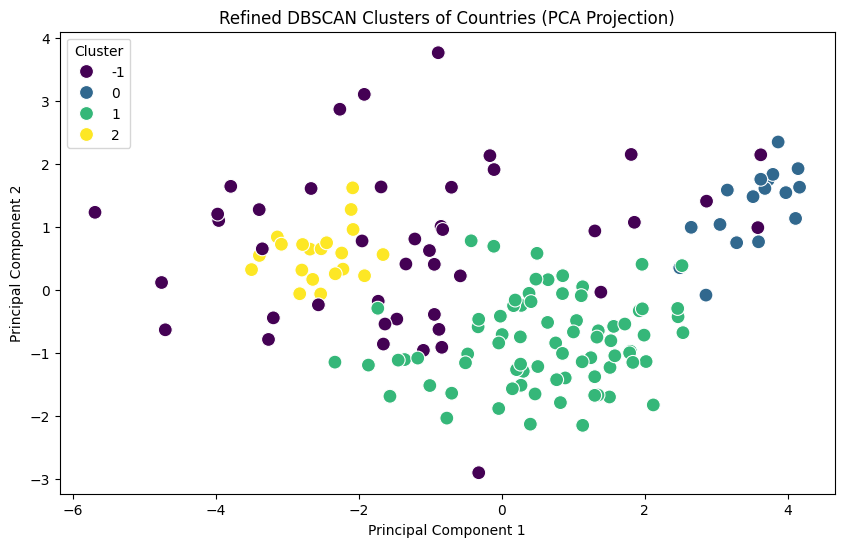

In [31]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions to 2
pca_refined = PCA(n_components=2)
pca_data_refined = pca_refined.fit_transform(scaled_data)

# Create a DataFrame to store the PCA-transformed data and refined cluster labels
pca_df_refined = pd.DataFrame(pca_data_refined, columns=['PC1', 'PC2'])
pca_df_refined['Cluster'] = dbscan_labels_refined
pca_df_refined['Country'] = country_data  # Assuming you already have 'country_data' available

import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a scatter plot to visualize the clusters and outliers
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df_refined, s=100, legend='full')

# Add labels and title to the plot
plt.title('Refined DBSCAN Clusters of Countries (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()


# KDD Process: World Happiness Report Clustering

---

### 1. Data Cleaning
- **Objective**: Remove noisy, irrelevant data and handle missing values to ensure data quality for analysis.
- **Steps**:
  - **Handling Missing Values**: Missing values in the dataset were handled by filling in with the mean values for numerical features.
  - **Noise Removal**: Any outliers and noisy data points that could potentially distort the clustering results were flagged for review.
  - **Data Discrepancy**: Ensured consistency in feature ranges and units. For instance, some features might need normalization due to varying scales (e.g., GDP per capita vs life expectancy).

---

### 2. Data Integration
- **Objective**: Combine heterogeneous data from multiple sources into a single dataset for analysis.
- **Steps**:
  - This dataset came from a single source, the **World Happiness Report**, so no additional integration was necessary.
  - Data integration tools such as ETL (Extract-Load-Transformation) could be applied if merging data from different sources, e.g., combining happiness data with economic indicators from other datasets.

---

### 3. Data Selection
- **Objective**: Select relevant data for the analysis to improve the efficiency of the data mining step.
- **Steps**:
  - Selected key features relevant to happiness analysis: **GDP per capita**, **social support**, **life expectancy**, **freedom to make life choices**, **generosity**, and **perceptions of corruption**.
  - Categorical or irrelevant features (such as country names) were removed during the preprocessing step, but kept aside for interpretation after clustering.

---

### 4. Data Transformation
- **Objective**: Transform data into the appropriate form required by the data mining procedure.
- **Steps**:
  - **Data Scaling**: Standardized the numerical data using **StandardScaler** to ensure that features contribute equally during clustering.
  - **Feature Engineering**: No new features were generated for this analysis, but could be relevant in future work (e.g., combining GDP and life expectancy into an economic strength indicator).

---

### 5. Data Mining
- **Objective**: Apply data mining techniques to extract useful patterns and insights from the data.
- **Steps**:
  - **Clustering Algorithm**: Applied **DBSCAN** to discover clusters of countries with similar happiness profiles. DBSCAN is a density-based clustering algorithm suitable for identifying clusters of varying shapes and sizes and detecting outliers.
  - **Cluster Formation**: The algorithm identified three distinct clusters and 124 outliers based on the happiness indicators.

---

### 6. Pattern Evaluation
- **Objective**: Evaluate the patterns extracted during the data mining step to determine their relevance and usefulness.
- **Steps**:
  - **Silhouette Score**: The clustering was evaluated using the **Silhouette Score**, which measured the quality of the clusters. DBSCAN achieved a score of **0.547**, indicating well-separated clusters.
  - **Outlier Detection**: The analysis highlighted **124 outlier countries** whose happiness indicators deviated significantly from the rest of the dataset, indicating potential areas of interest for further study.

---

### 7. Knowledge Representation
- **Objective**: Present the extracted knowledge in a user-friendly and interpretable way.
- **Steps**:
  - **Visualization**: Created scatter plots using **PCA** to visualize the clusters in a 2D space, making the relationships between countries more interpretable.
  - **Interpretation**: Mapped the clusters back to the countries for a clearer understanding of which regions or countries share similar happiness profiles.
  - **Reporting**: A detailed report was prepared to summarize the findings, including cluster analysis, outlier detection, and potential applications of these insights in policymaking or regional happiness interventions.

---
